In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import numpy as np
import capsol.capsol as cap
from scipy import linalg
from scipy import sparse
from scipy.sparse import linalg as la
import capsol.spherecheck as sp

import matplotlib.pyplot as plt

In [2]:
cap.epsilon_z

<function capsol.capsol.epsilon_z(z, d, eps_r)>

In [3]:
params = cap.ParamsSample(d=10.0, h0=0.5, hsam=10.0)

In [4]:
def prefactor_y_new(Dy_minus, Dy_plus):
    return 2/((Dy_plus+Dy_minus) * Dy_minus * Dy_plus)

def prefactor_y_old(Dy_minus, Dy_plus):
    return 4/((Dy_plus+Dy_minus)*(Dy_plus**2 + Dy_minus**2))

In [5]:
prefactor_y_new(0.5, 0.5*1.01)

7.881385153440717

In [6]:
prefactor_y_old(0.5, 0.5*1.01)

7.880995005173135

In [7]:
r =np.arange(0, 2.25,0.5)
z = np.arange(-2.0, 1.5, 0.5)
eps_z = cap.epsilon_z(z, params.d, params.eps_r)

A = cap.poisson_variable_spacing_radial_samp(r, z, eps_z)

In [8]:
sim = cap.CapSolSample(params)

In [9]:
sim.z[:10]

array([-20. , -19.5, -19. , -18.5, -18. , -17.5, -17. , -16.5, -16. ,
       -15.5])

In [10]:
sim.setup_matrices()

In [11]:
sim.r_ratio

1.0141700000000928

In [12]:
sim.z_ratio

1.0141700000000928

In [13]:
sim.solve()
sim.process()

3.04826003944298e-15

In [14]:
p2 = cap.ParamsSample(d=10.0, h0=0.5, hsam=10.0, eps_r=1.0)
sim2 = cap.CapSolSample(p2)
sim2.run()

Grids:
r_ratio = 1.014, z_ratio = 1.014
Setting up matrices:
Solving...
C = 3.04715e-15 F
Done!


In [15]:
sim3 = cap.CapSol(p2)
sim3.run()

Grids:
r_ratio = 1.014, z_ratio = 1.014
Setting up matrices:
Solving...
C = 3.04715e-15 F
Done!


In [49]:
sim4 = cap.CapSolSample(p2)
sim4.run()

Grids:
r_ratio = 1.014, z_ratio = 1.014
Setting up matrices:
Solving...
C = 3.04715e-15 F
Done!


Grids:
r_ratio = 1.014, z_ratio = 1.014
Setting up matrices:
Solving...
C = 3.32900e-18 F
Done!


In [100]:
params = cap.ParamsSample(d=10.0, h0=0.25, zMax=1e6, rhoMax=1e6,
                          hsam=10.0, Nuni=100, Nr=1000, Nz_plus=1000)
sim4 = cap.SphereTestSample(params)
sim4.run()

Grids:
r_ratio = 1.012, z_ratio = 1.012
Setting up matrices:
Solving...
C = 3.19768e-18 F
Done!


In [98]:
params5 = cap.ParamsSample(d=10.0, h0=0.25, zMax=1e6, rhoMax=1e6,
                          hsam=10.0, Nuni=100, Nr=1000, Nz_plus=1000, eps_r=1)
sim5 = cap.SphereTestSample(params5)
sim5.run()

Grids:
r_ratio = 1.012, z_ratio = 1.012
Setting up matrices:
Solving...
C = 2.95727e-18 F
Done!


In [ ]:
params5 = cap.ParamsSample(d=10.0, h0=0.25, zMax=1e6, rhoMax=1e6,
                          hsam=10.0, Nuni=100, Nr=1000, Nz_plus=1000, eps_r=1)
sim5 = cap.SphereTestSample(params5)
sim5.run()


1. Initial: 3.36807e-18 F

2. Smoothed eps_z_grid: 3.36807e-18 F

Smoothed eps_z_grid formulation (smoothly transitioning from 1 to the correct value inside the simulation boundary): e-18 F

In [32]:
C_exact = sp.sphereCap(params.Rtip*1e-9, params.d*1e-9, params.eps_r, params.hsam*1e-9)

In [101]:
C_exact = sp.sphereCap(params5.Rtip*1e-9, params5.d*1e-9,
                       params5.eps_r, params5.hsam*1e-9)
C_exact

2.9841972419439168e-18

In [102]:
C_exact4 = sp.sphereCap(params.Rtip*1e-9, params.d*1e-9,
                       params.eps_r, params.hsam*1e-9)
C_exact4

3.2228093607840695e-18

In [23]:
params

ParamsSample(Rtip=20.0, theta_deg=15.0, Hcone=15000.0, Hcant=500.0, Rcant=15000.0, zMax=20000.0, rhoMax=20000.0, h0=0.5, d=10.0, Nuni=50, Nr=500, Nz_plus=500, hsam=10.0, eps_r=3.0, equally_spaced_sample=True)

In [26]:
sim4.z[:30]

array([-20. , -19.5, -19. , -18.5, -18. , -17.5, -17. , -16.5, -16. ,
       -15.5, -15. , -14.5, -14. , -13.5, -13. , -12.5, -12. , -11.5,
       -11. , -10.5, -10. ,  -9.5,  -9. ,  -8.5,  -8. ,  -7.5,  -7. ,
        -6.5,  -6. ,  -5.5])

In [27]:
sim4.eps_z

array([3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

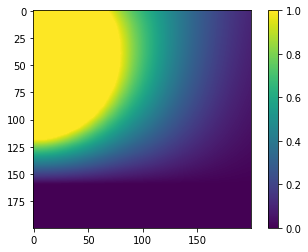

In [50]:
plt.imshow(sim4.u[:200, :200][::-1, :])
plt.colorbar()

In [104]:
params6 = cap.ParamsSample(d=20.0, h0=0.25, zMax=1e6, rhoMax=1e6,
                          hsam=0, Nuni=100, Nr=1000, Nz_plus=1000, eps_r=1)
sim6 = cap.SphereTest(params)
sim6.run()

Grids:
r_ratio = 1.012, z_ratio = 1.012
Setting up matrices:
Solving...
C = 2.95727e-18 F
Done!


In [ ]:
params7 = cap.ParamsSamplemple()

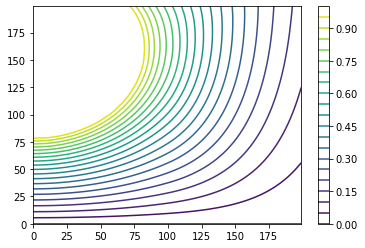

In [108]:
plt.contour(sim5.u[:200, :200], levels=20)
plt.colorbar()

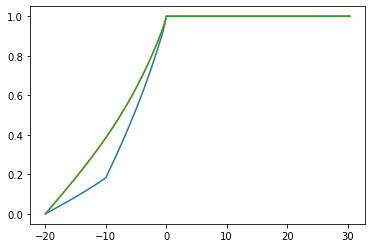

In [109]:
plt.plot(sim4.z[:200],sim4.u[:200,0])
plt.plot(sim5.z[:200], sim5.u[:200, 0])
plt.plot(sim6.z[:200], sim6.u[:200, 0])

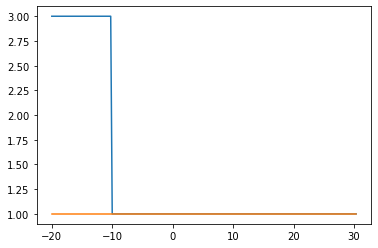

In [110]:
plt.plot(sim4.z[:200], sim4.eps_z[:200])
plt.plot(sim5.z[:200], sim5.eps_z[:200])

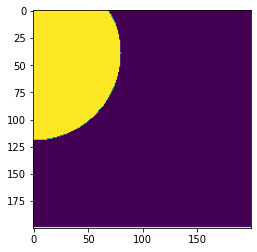

In [70]:
plt.imshow(sim4.boundary.reshape((sim4.z.size, sim4.r.size))[:200, :200][::-1])

In [131]:
np.set_printoptions(precision=2)

In [132]:
print(sim5.A[:10, :10].todense())

[[ 96.   -32.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [ -8.    96.   -24.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.   -12.    96.   -20.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.   -13.33  96.   -18.67   0.     0.     0.     0.     0.  ]
 [  0.     0.     0.   -14.    96.   -18.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.   -14.4   96.   -17.6    0.     0.     0.  ]
 [  0.     0.     0.     0.     0.   -14.67  96.   -17.33   0.     0.  ]
 [  0.     0.     0.     0.     0.     0.   -14.86  96.   -17.14   0.  ]
 [  0.     0.     0.     0.     0.     0.     0.   -15.    96.   -17.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.   -15.11  96.  ]]


In [112]:
print(sim6.A[:10, :10].todense())

[[ 96.  -32.    0.    0.    0.    0.    0.    0.    0.    0. ]
 [ -8.   96.  -24.    0.    0.    0.    0.    0.    0.    0. ]
 [  0.  -12.   96.  -20.    0.    0.    0.    0.    0.    0. ]
 [  0.    0.  -13.3  96.  -18.7   0.    0.    0.    0.    0. ]
 [  0.    0.    0.  -14.   96.  -18.    0.    0.    0.    0. ]
 [  0.    0.    0.    0.  -14.4  96.  -17.6   0.    0.    0. ]
 [  0.    0.    0.    0.    0.  -14.7  96.  -17.3   0.    0. ]
 [  0.    0.    0.    0.    0.    0.  -14.9  96.  -17.1   0. ]
 [  0.    0.    0.    0.    0.    0.    0.  -15.   96.  -17. ]
 [  0.    0.    0.    0.    0.    0.    0.    0.  -15.1  96. ]]


In [5]:
p10 = cap.ParamsSample(d=10.0, h0=0.2, zMax=20e6, rhoMax=20e6,
                       hsam=10.0, Nuni=300, Nr=1400, Nz_plus=1400,
                       eps_r=3)

s10 = cap.SphereTestSample(p10)




# s10.run()

In [ ]:
z_sample = np.arange(-p10.hsam-p10.d,
                     -p10.d, p10.h0/p10.eps_r)
new_z = np.r_[z_sample, s10.z[50:]]
s10.z = new_z
s10._setup_grid_and_boundary()
s10.run()

Grids:
r_ratio = 1.013, z_ratio = 1.013
Setting up matrices:
Solving...


In [ ]:
C_exact = sp.sphereCapParams(p10)

In [ ]:
100*(s10.c - C_exact)/C_exact

- At 1300x1300 grids, roughly -0.5 percent error in C_exact
- What about at 1500x1500? Still the same -0.5 percent error, roughly. - Does changing Nuni help more? Nope, still the same...
- What about using data points more closely spaced in the sample (so that $\Delta z_\text{sample} \approx h_0 / \varepsilon_\text{r}$
- Probably needs to be faster...

In [122]:
s10

CapSol(params=ParamsSample(Rtip=20.0, theta_deg=15.0, Hcone=15000.0, Hcant=500.0, Rcant=15000.0, zMax=30000000.0, rhoMax=30000000.0, h0=0.2, d=10.0, Nuni=200, Nr=1500, Nz_plus=1500, hsam=10.0, eps_r=3, equally_spaced_sample=True))

In [123]:
    s10.c

3.207601409775207e-18